## Establishing a Benchmark
NSW actual energy demand is given in *'totaldemand'* dataset and its forecast is given in *'forecastdemand'* dataset. We calculate some common evolution matrics using this datasets, which can be used as benchmark for our selected models. 

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# function root mean squared error (rsme)
def rmse(pred, actual): 
	return np.sqrt(((pred-actual)**2).mean())

# function mean absolute percentage error (mape)
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

#### Forecast Demand dataset

In [22]:
# Read data into dataframe
forecast_demand = pd.read_csv('/Users/nizam/Desktop/data/forecastdemand_nsw.csv')

# Selecting period 48 gives a 24-hourly dataset with 30min frequency 
forecast_demand_30min = forecast_demand.loc[forecast_demand['PERIODID']==48]

# Only keep required features
forecast_demand_30min = forecast_demand_30min[["DATETIME","FORECASTDEMAND"]]
forecast_demand_30min.head()

,DATETIME,FORECASTDEMAND
23,2010-01-01 00:00:00,7822.38
93,2010-01-01 00:30:00,7715.68
164,2010-01-01 01:00:00,7482.56
236,2010-01-01 01:30:00,7129.32
309,2010-01-01 02:00:00,6800.73


#### Total Demand dataset

In [23]:
# Read data into dataframe
actual_demand = pd.read_csv('/Users/nizam/Desktop/data/totaldemand_nsw.csv')

actual_demand = actual_demand[['DATETIME','TOTALDEMAND']]

#### Merge '*forecastdemand*' and '*totaldemand*' dataset

In [24]:
# merge the two datasets into one dataframe
merged_df = pd.merge(forecast_demand_30min, actual_demand, on='DATETIME', how='inner') 

### Calculate the error statistics for to be used as a benchmark

In [27]:
# Calculating MAPE, MAE and RMSE

MAPE = mape(merged_df.TOTALDEMAND, merged_df.FORECASTDEMAND) # 2.468558
MAE = mean_absolute_error(merged_df.TOTALDEMAND, merged_df.FORECASTDEMAND) # 204.026922
RMSE = rmse(merged_df.TOTALDEMAND, merged_df.FORECASTDEMAND) # 280.450206
columns = ['Model', 'MAPE', 'MAE', 'RMSE']
metrics = pd.DataFrame(columns = columns)
metrics.loc[0] = ['Given forecast', MAPE, MAE, RMSE]
metrics

,Model,MAPE,MAE,RMSE
0,Given forecast,2.468558,204.026922,280.450206


#### How well is the given demand forecast against the actual demand

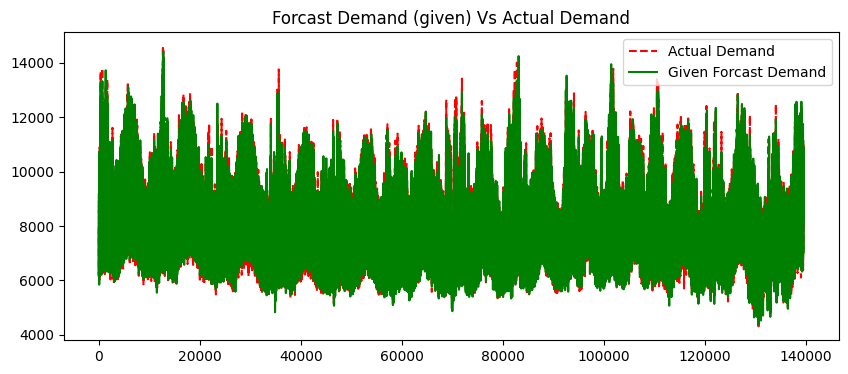

In [26]:
# visualize the accuricy of the forecast data
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(merged_df['TOTALDEMAND'], 'r--', label = 'Actual Demand')
ax.plot(merged_df['FORECASTDEMAND'], 'g', label = 'Given Forcast Demand')
ax.legend()
ax.set_title('Forcast Demand (given) Vs Actual Demand')
plt.show()

Comment: The accuracy of the forecast of energy demand is quite significant.